In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Visualize

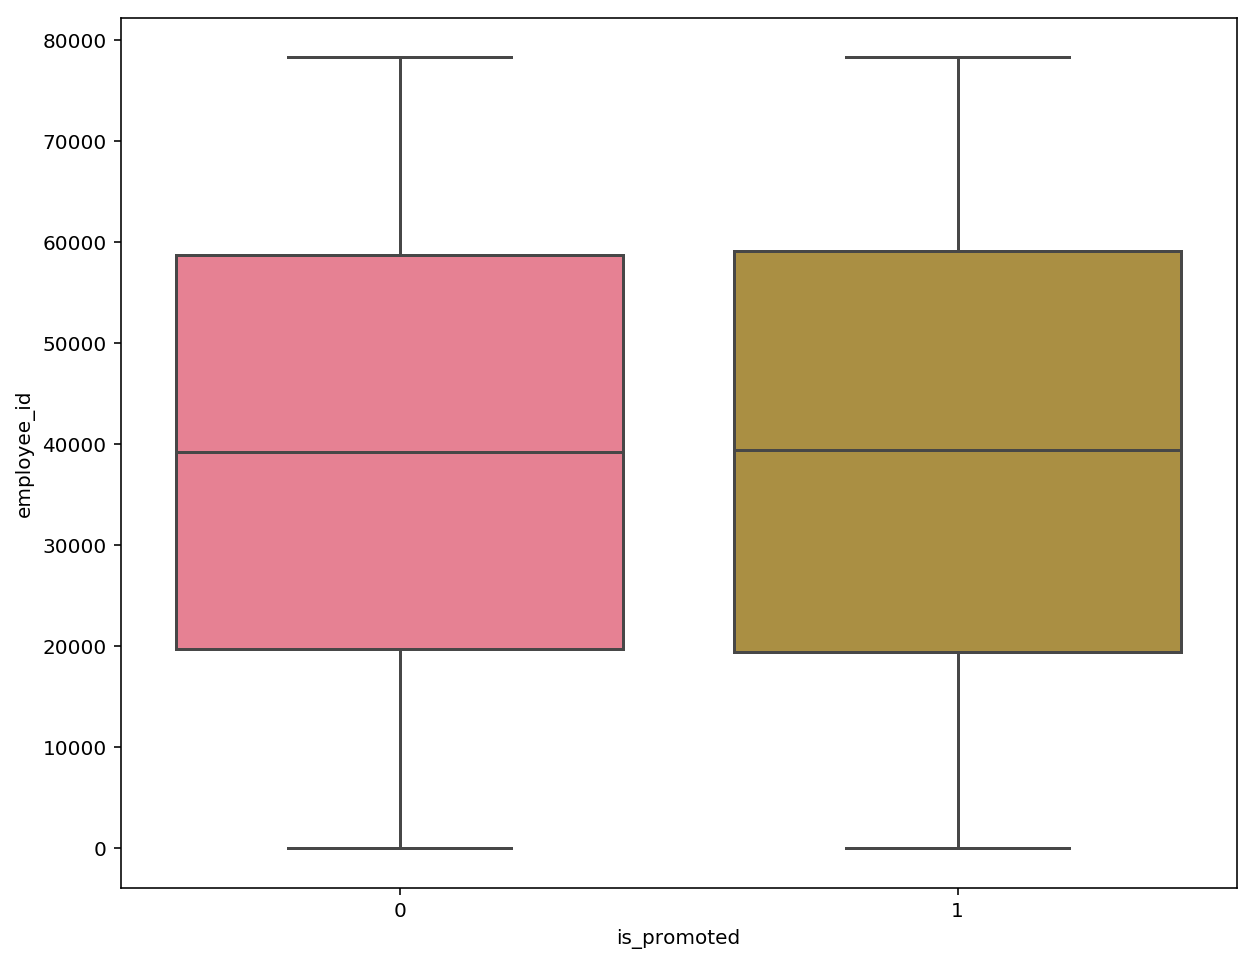

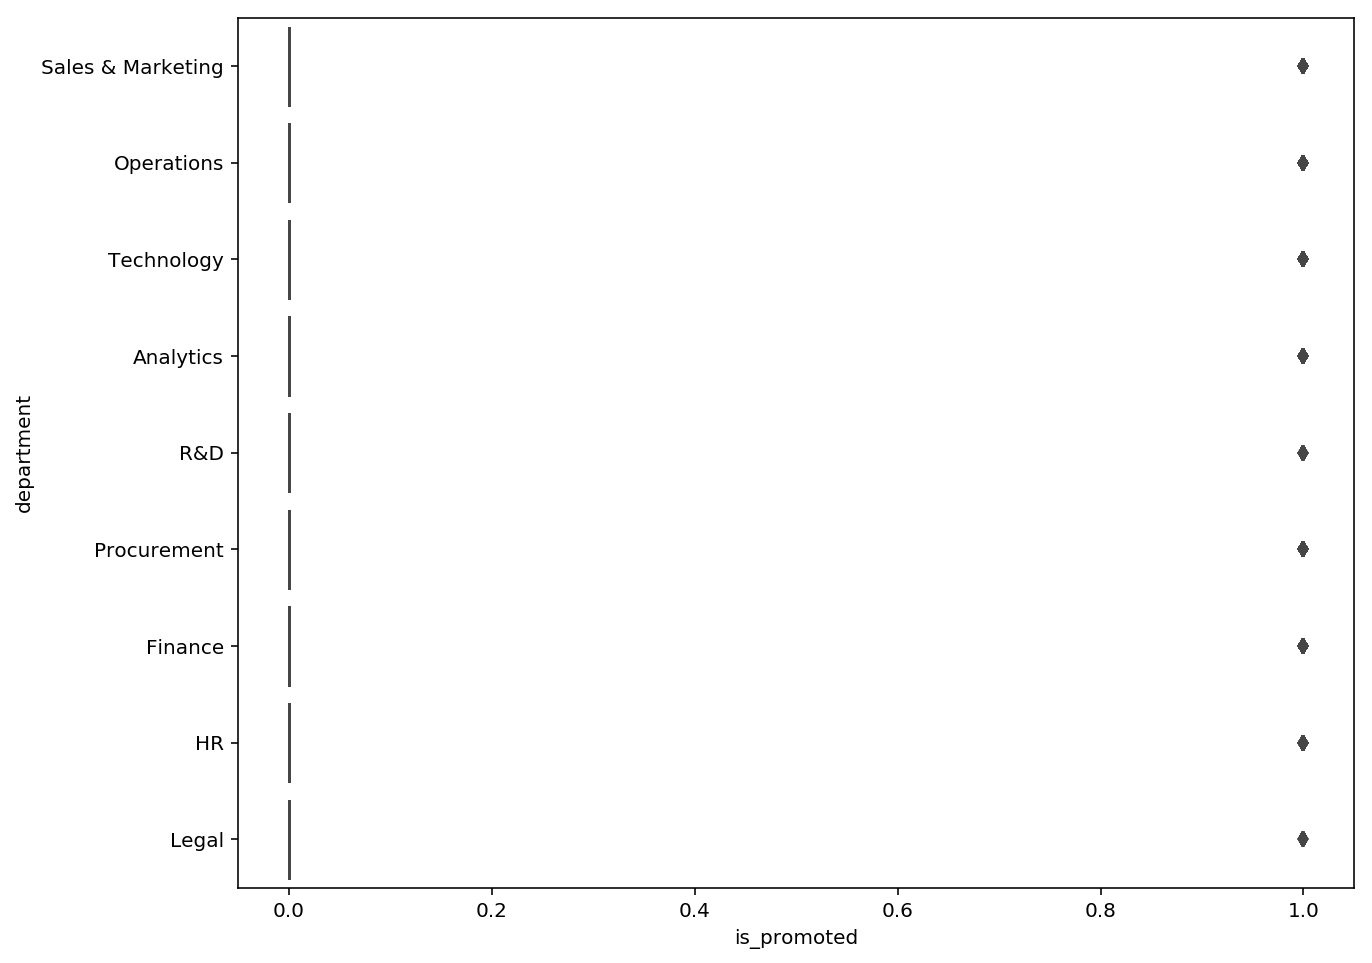

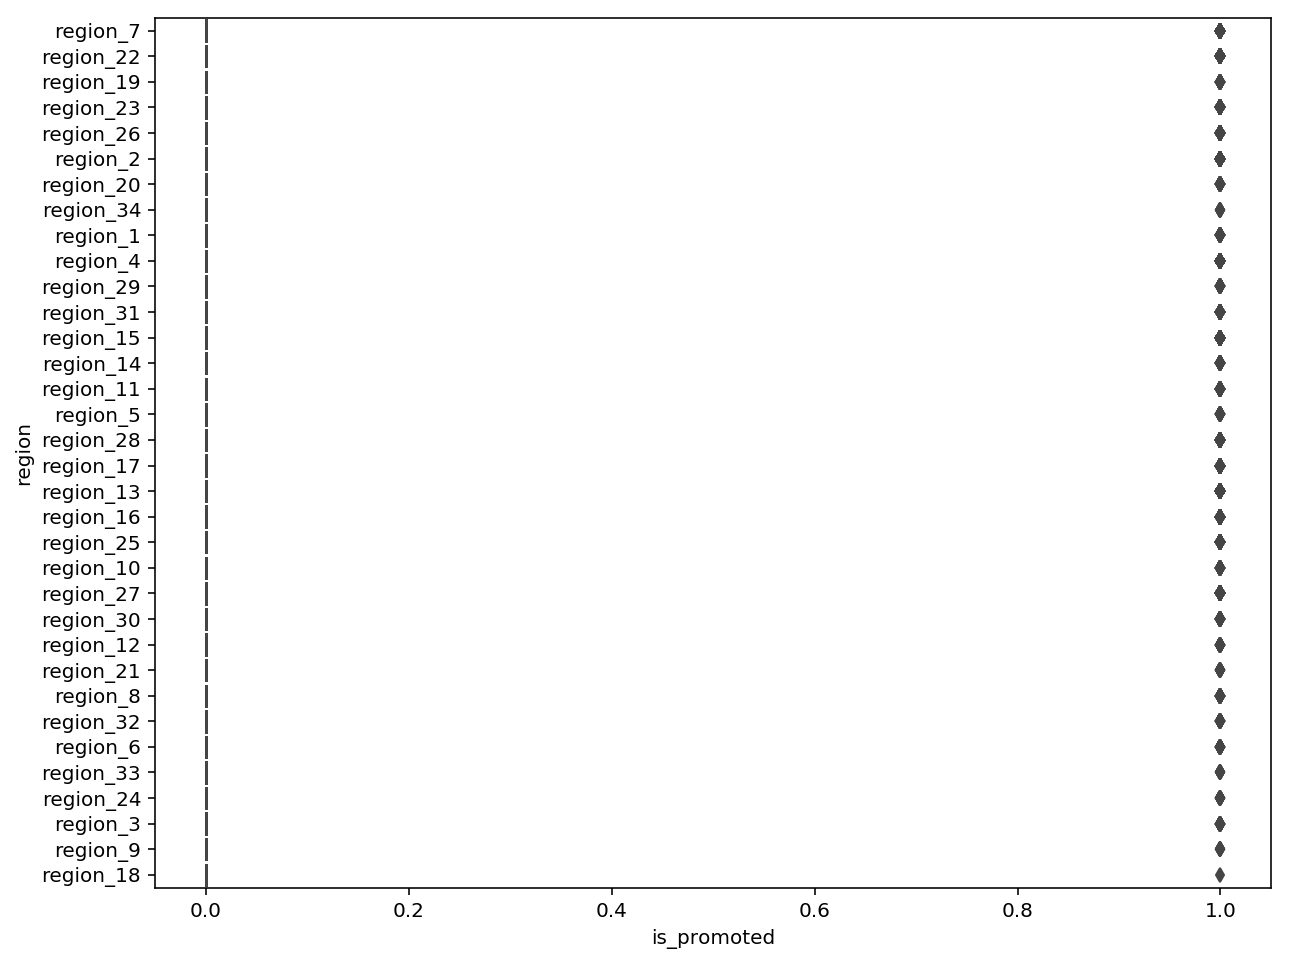

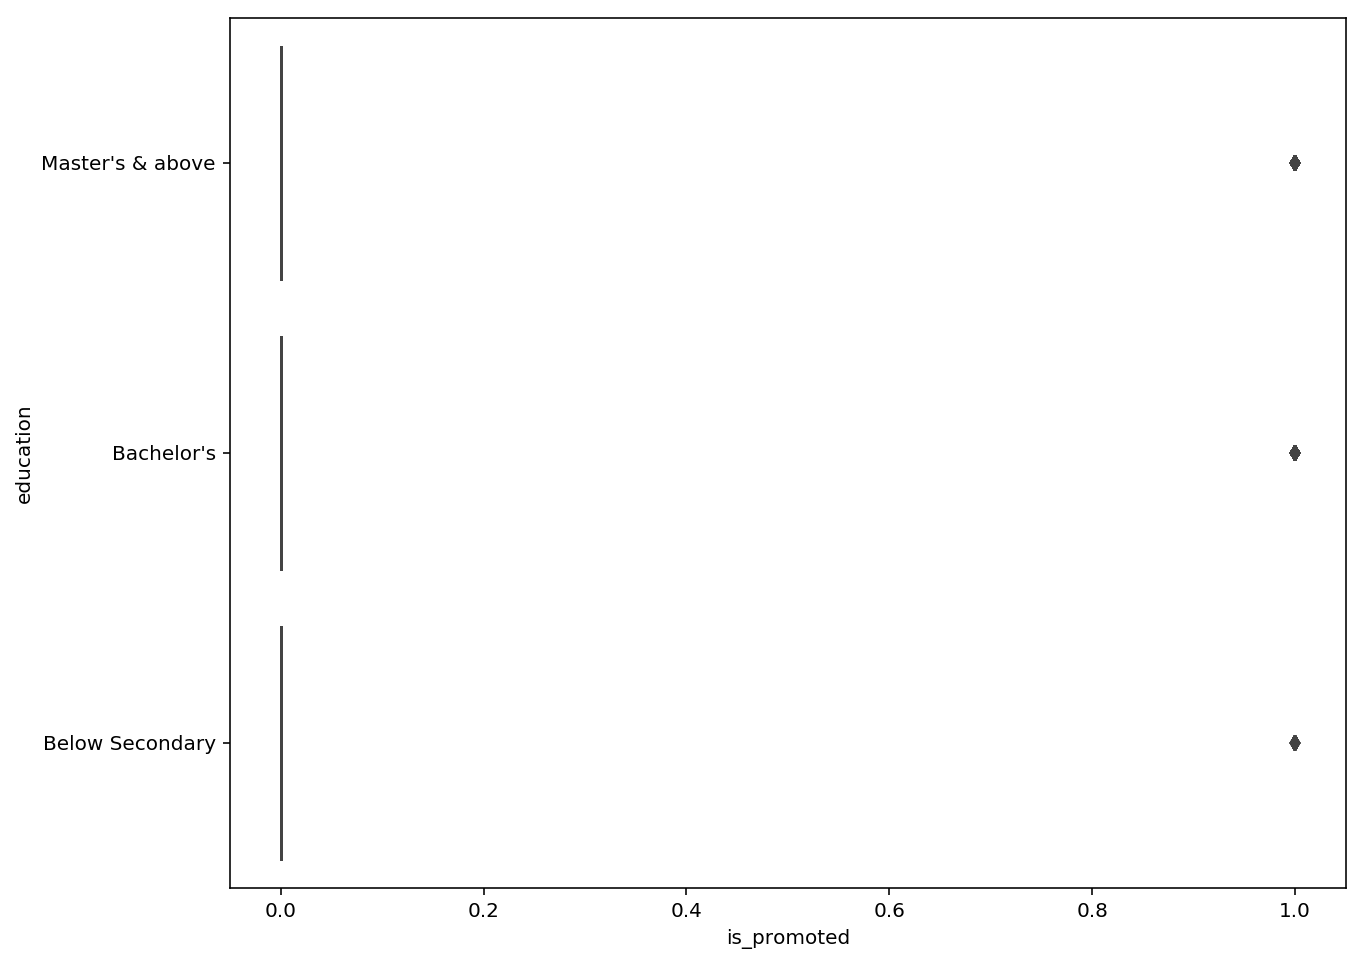

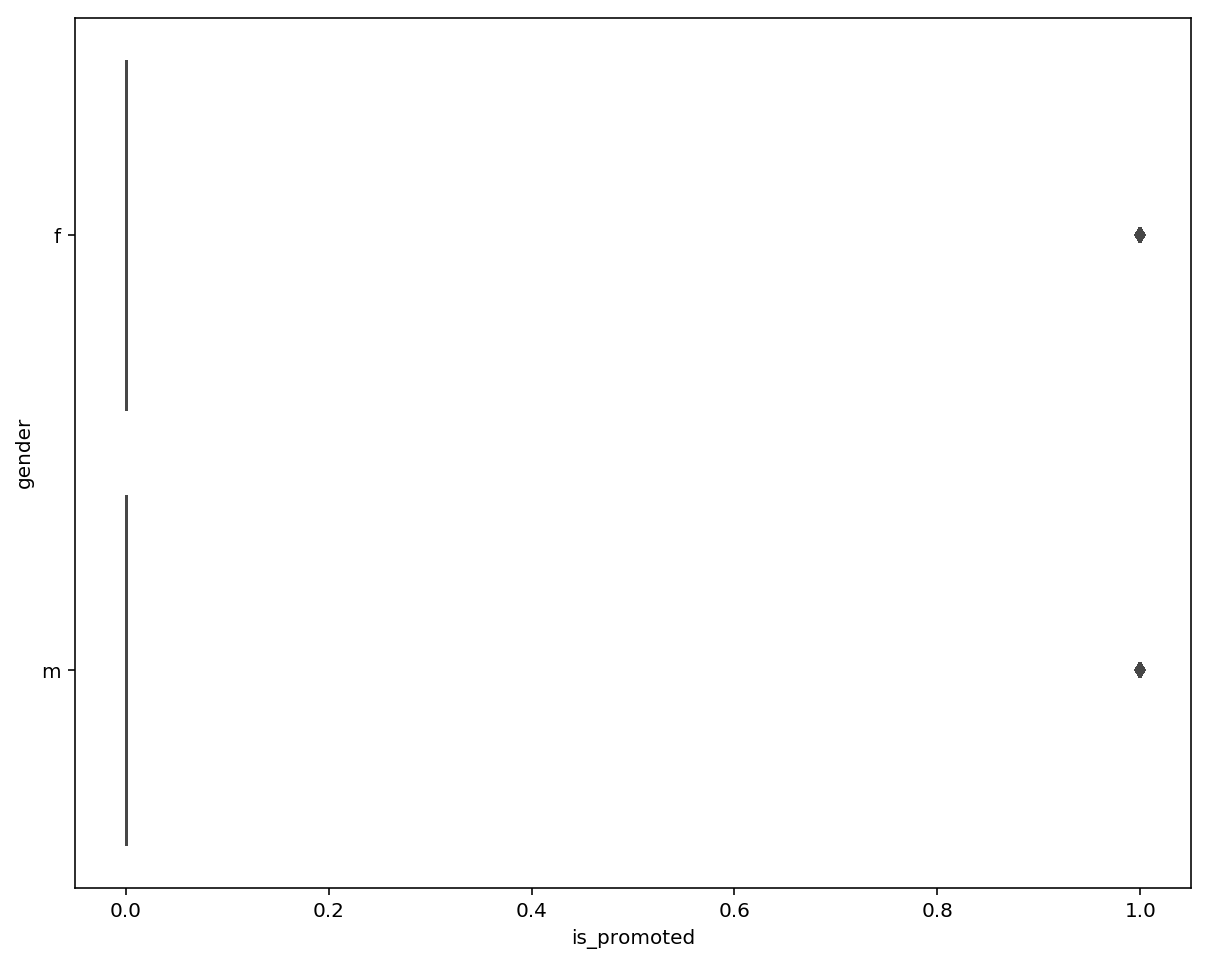

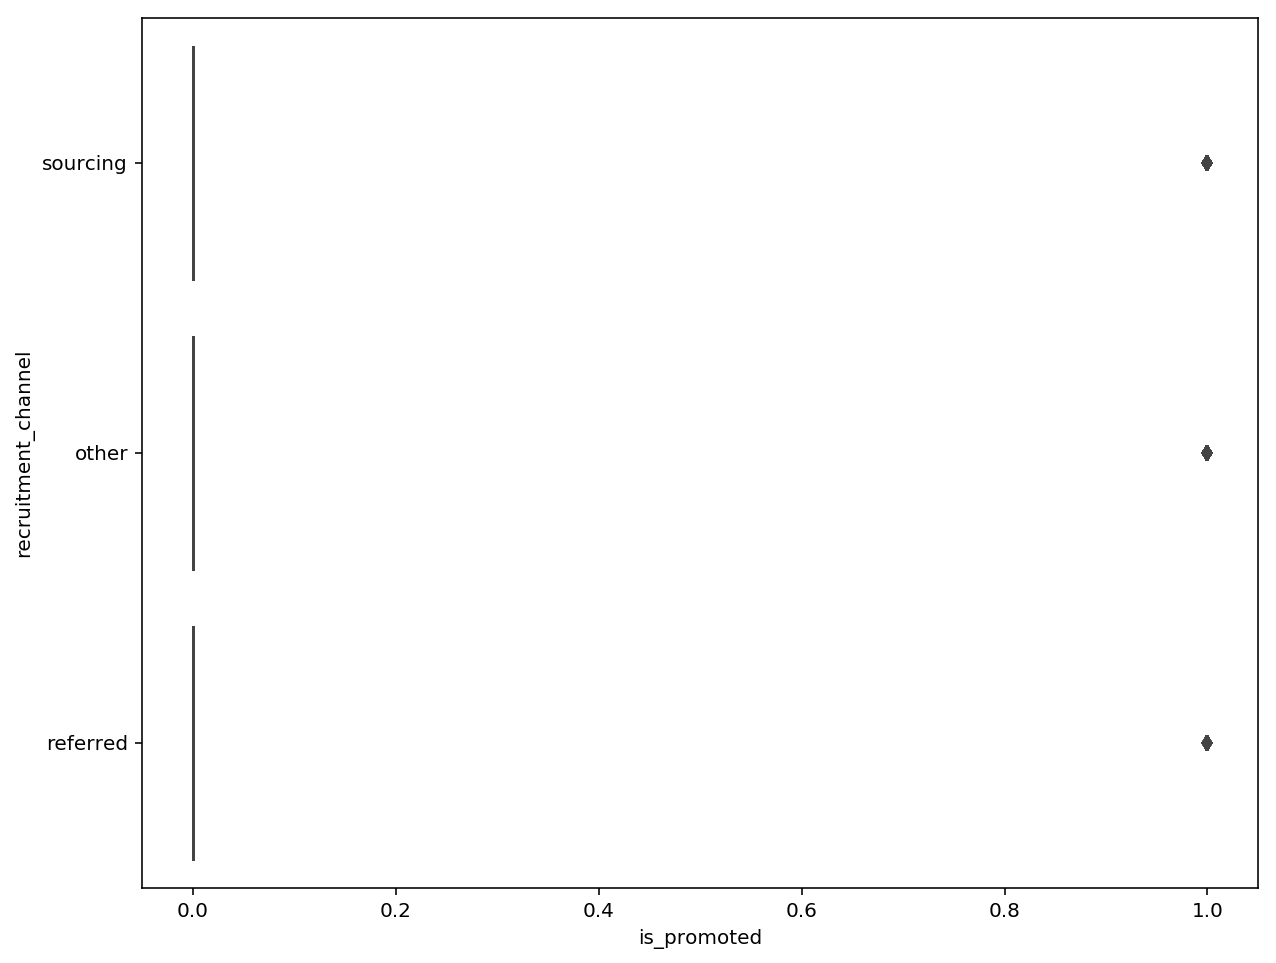

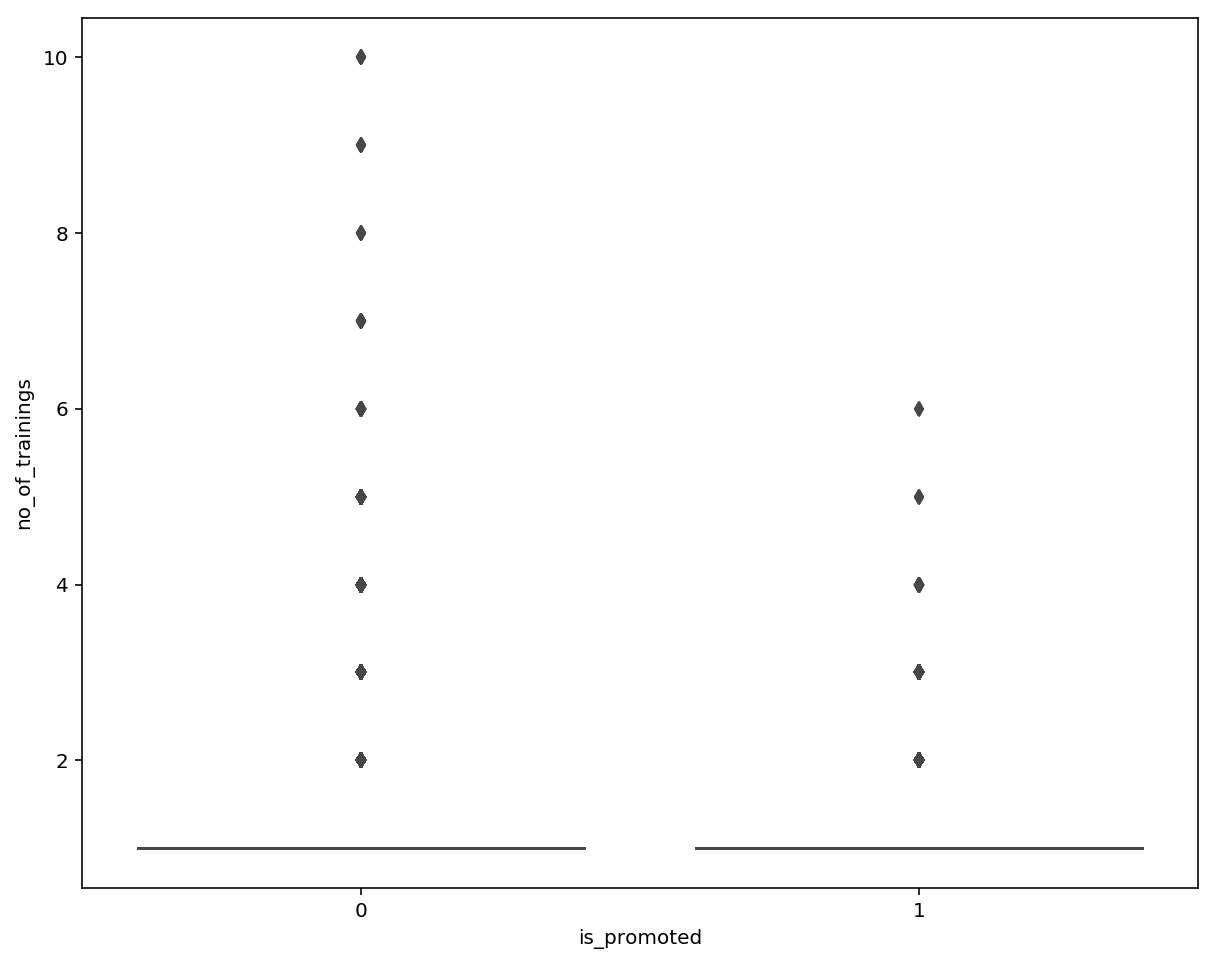

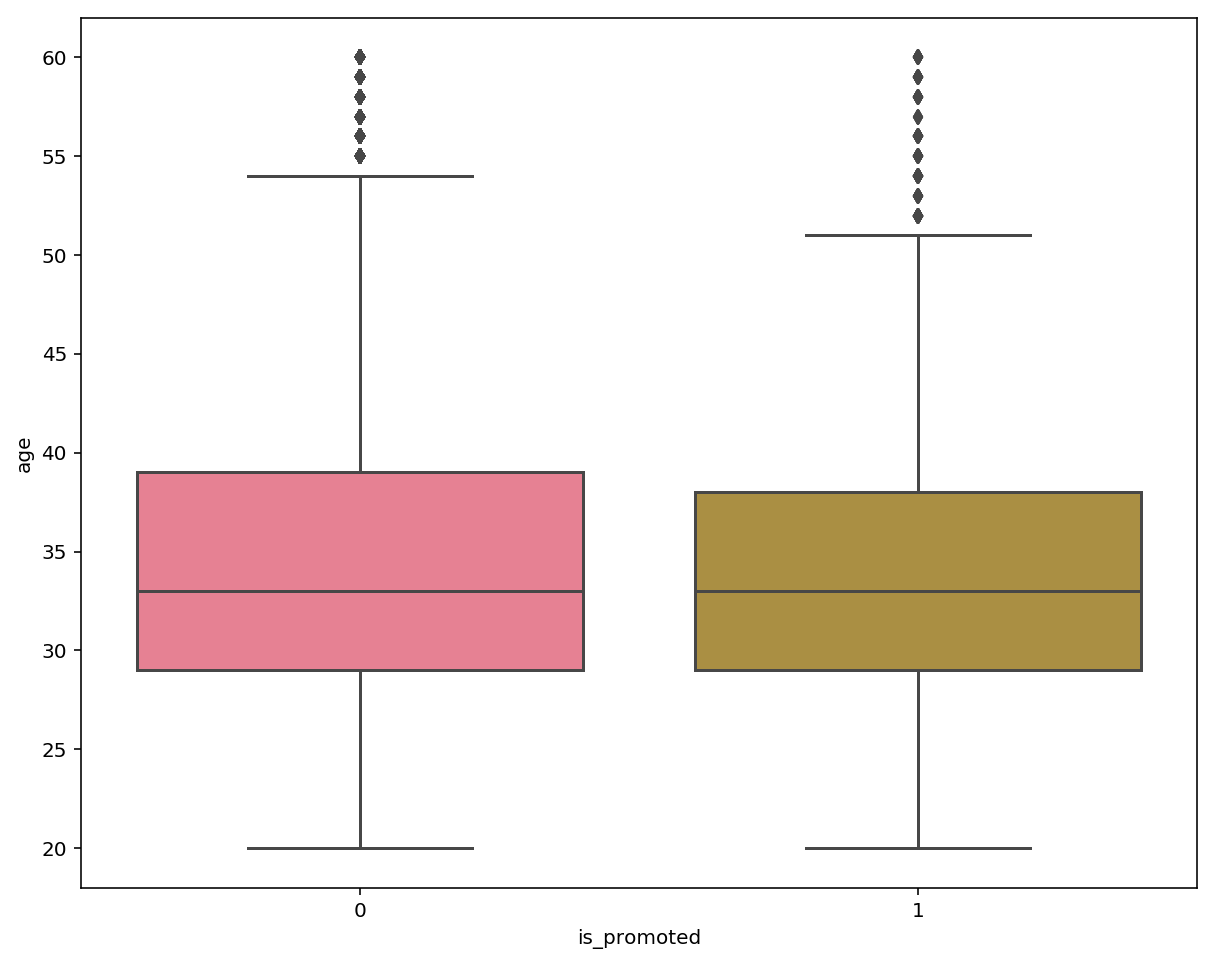

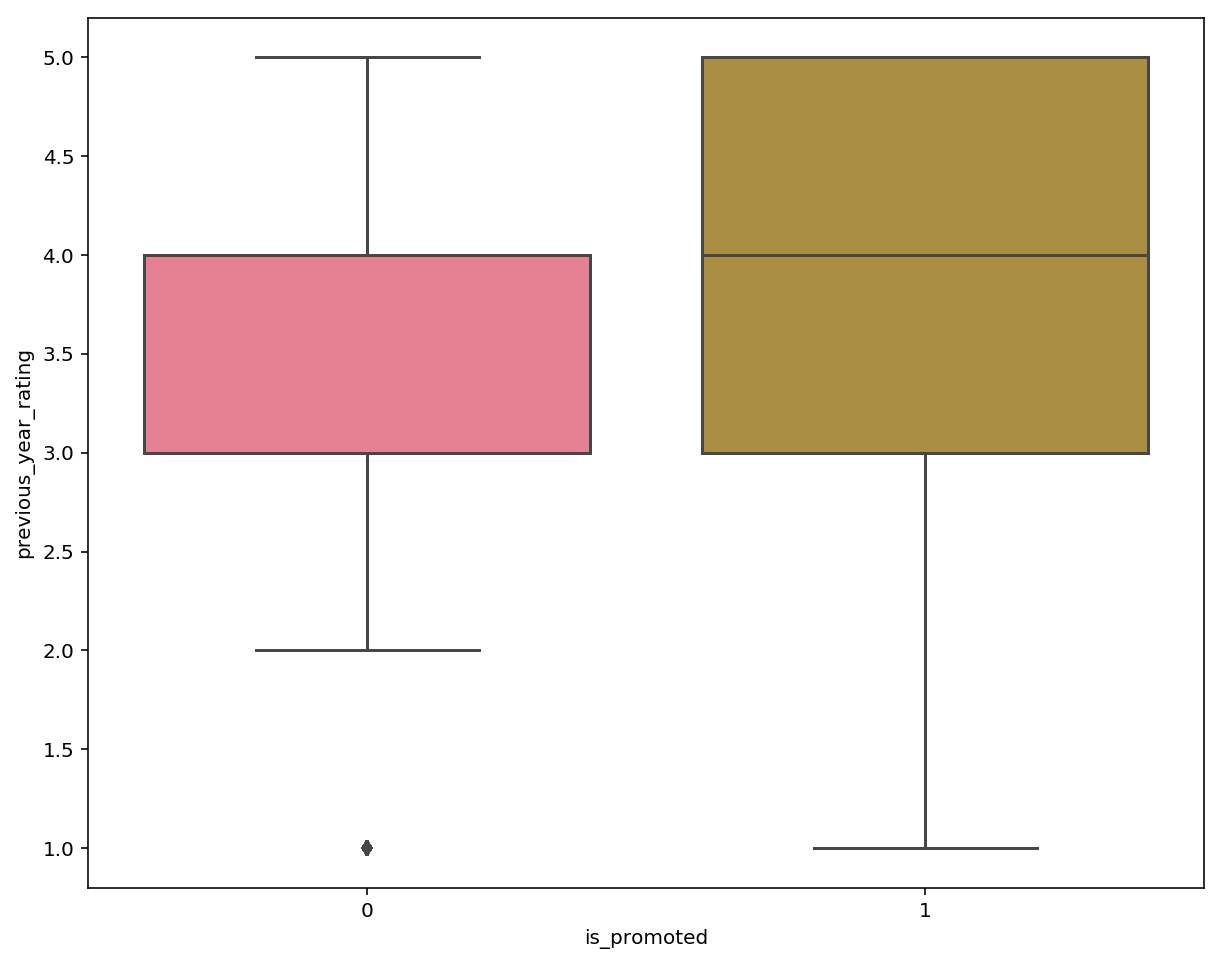

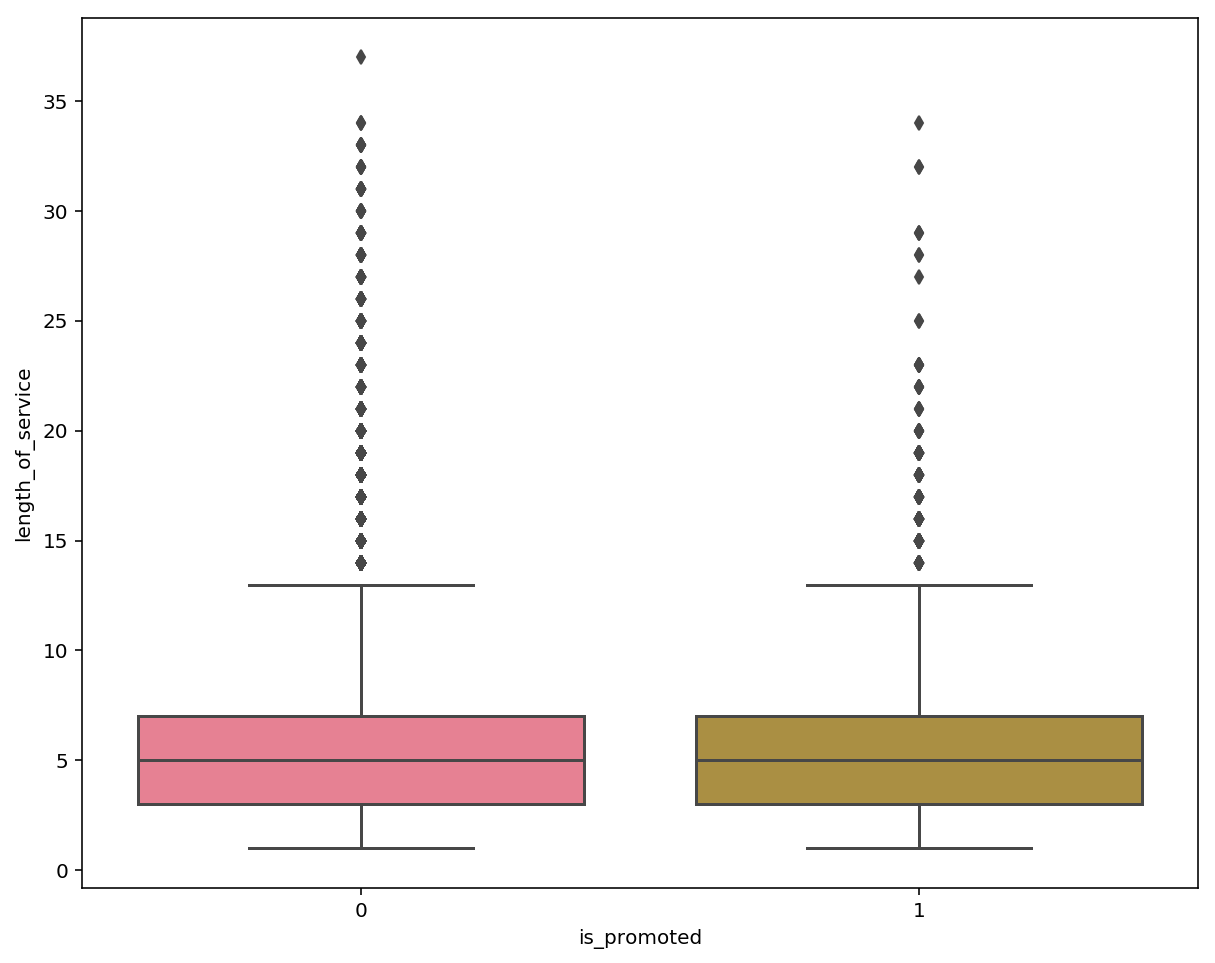

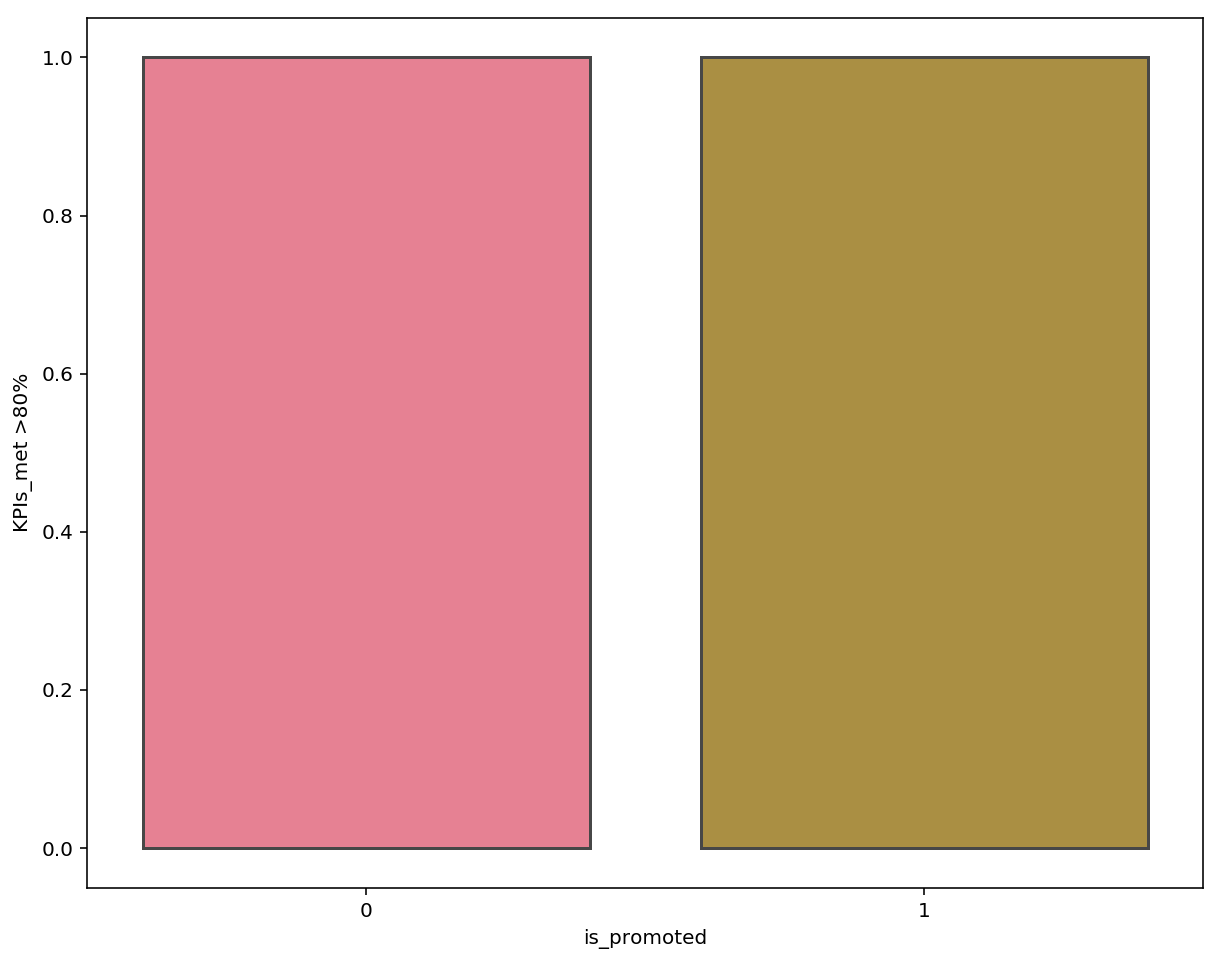

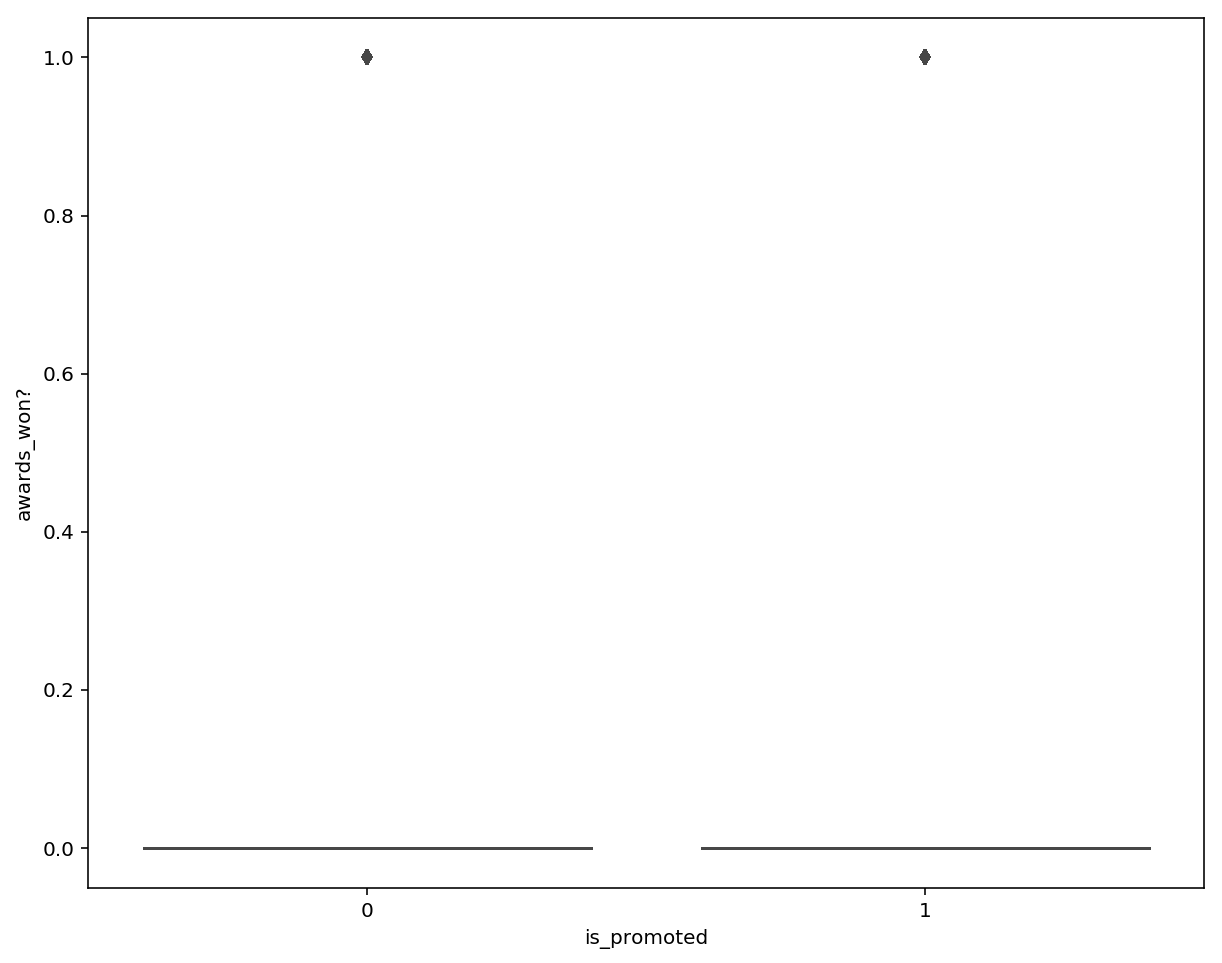

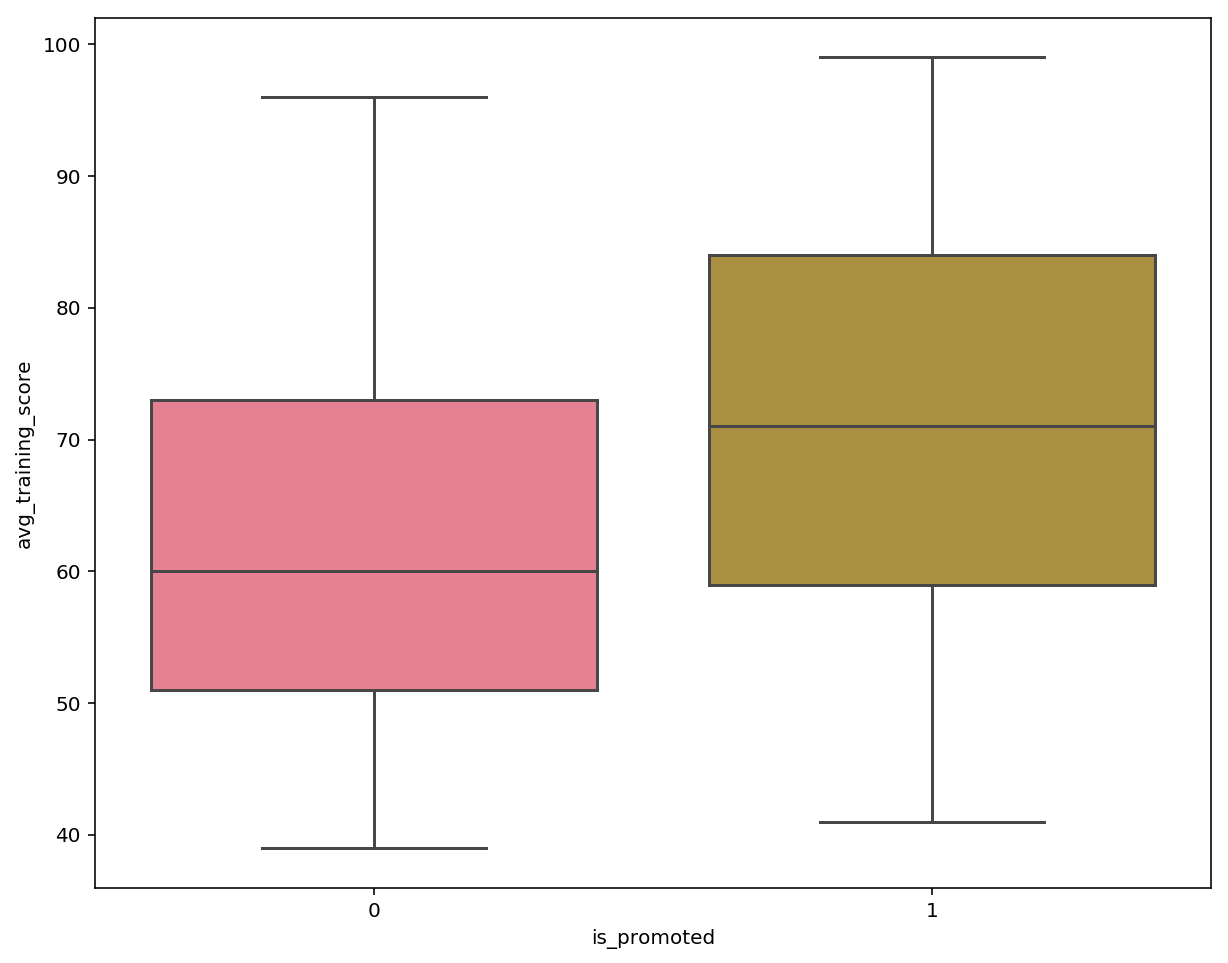

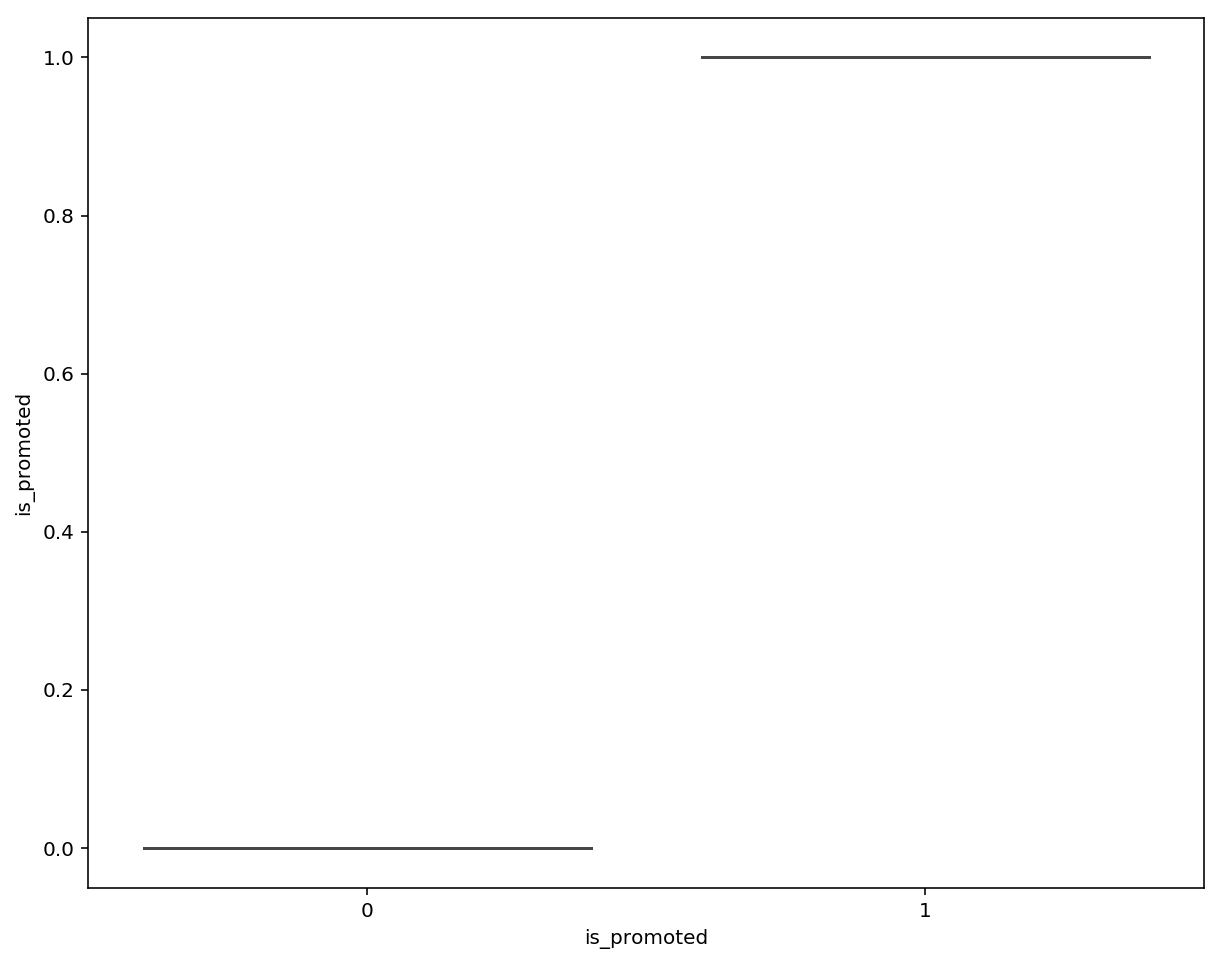

In [14]:
for col in train.columns.values:
    plt.figure(figsize = (10, 8))
    sns.boxplot('is_promoted', col, data = train)
    plt.show()

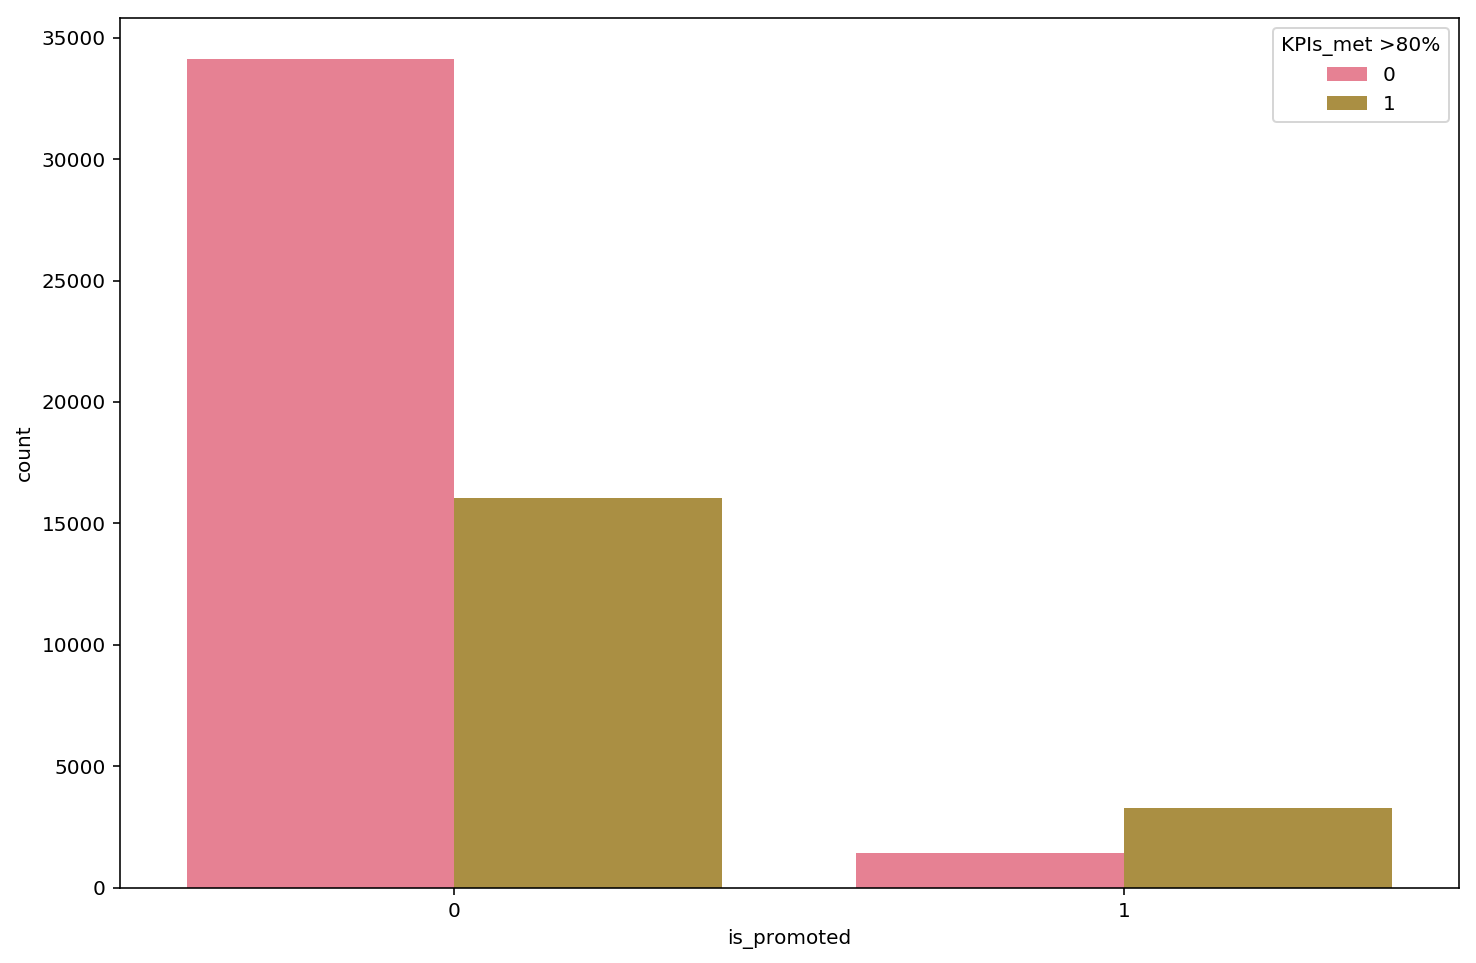

In [15]:
sns.set_palette("husl")
sns.countplot("is_promoted", data = train, hue = 'KPIs_met >80%')

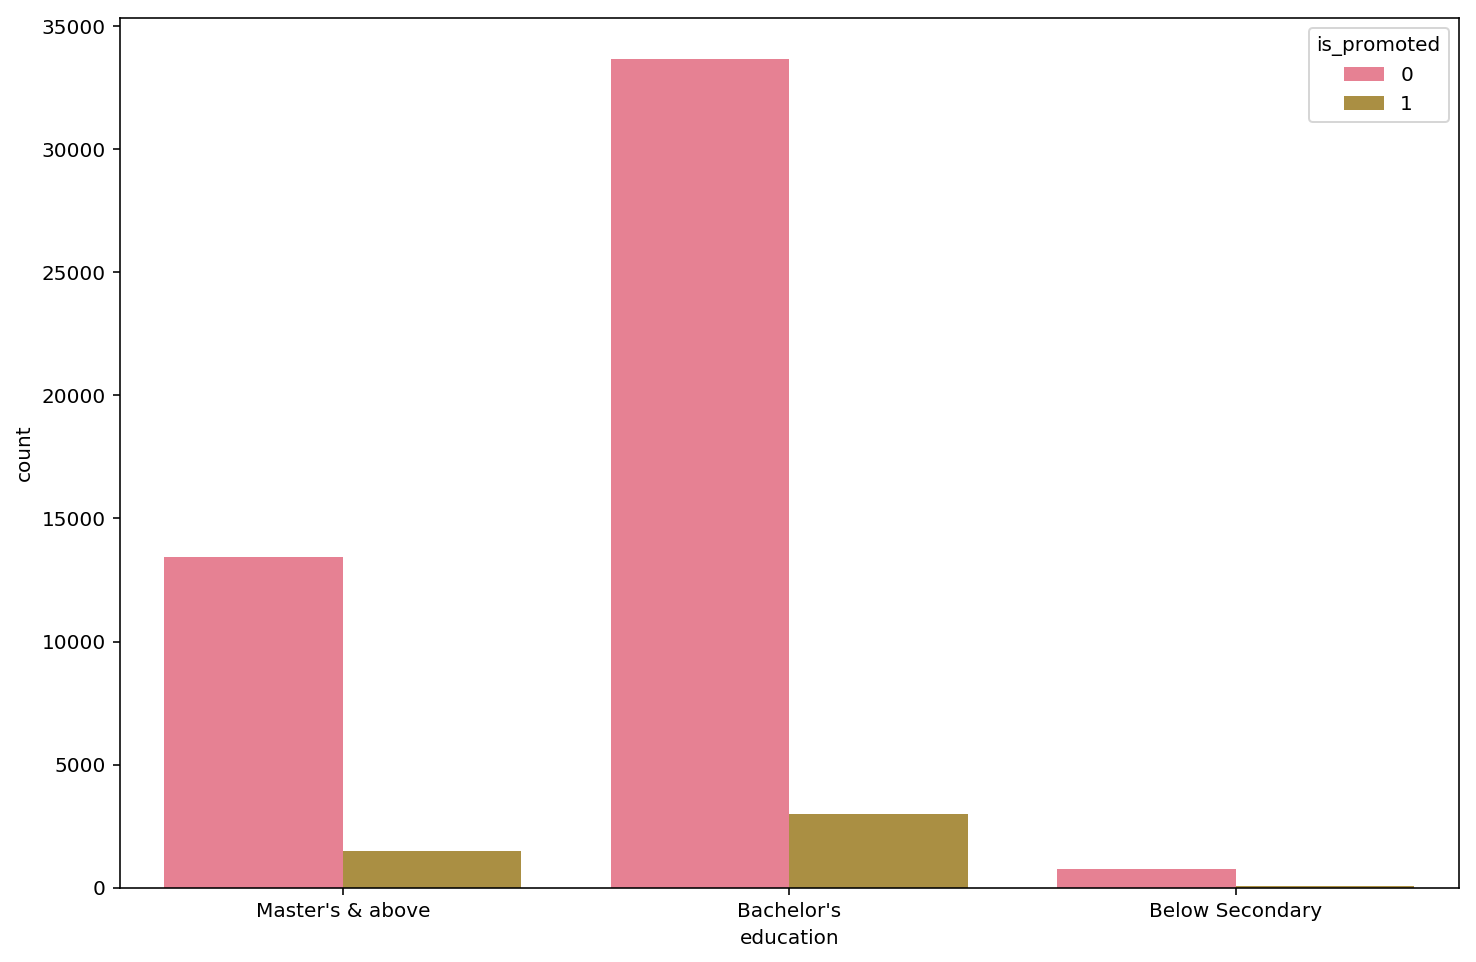

In [16]:
sns.countplot("education", hue = "is_promoted", data= train)

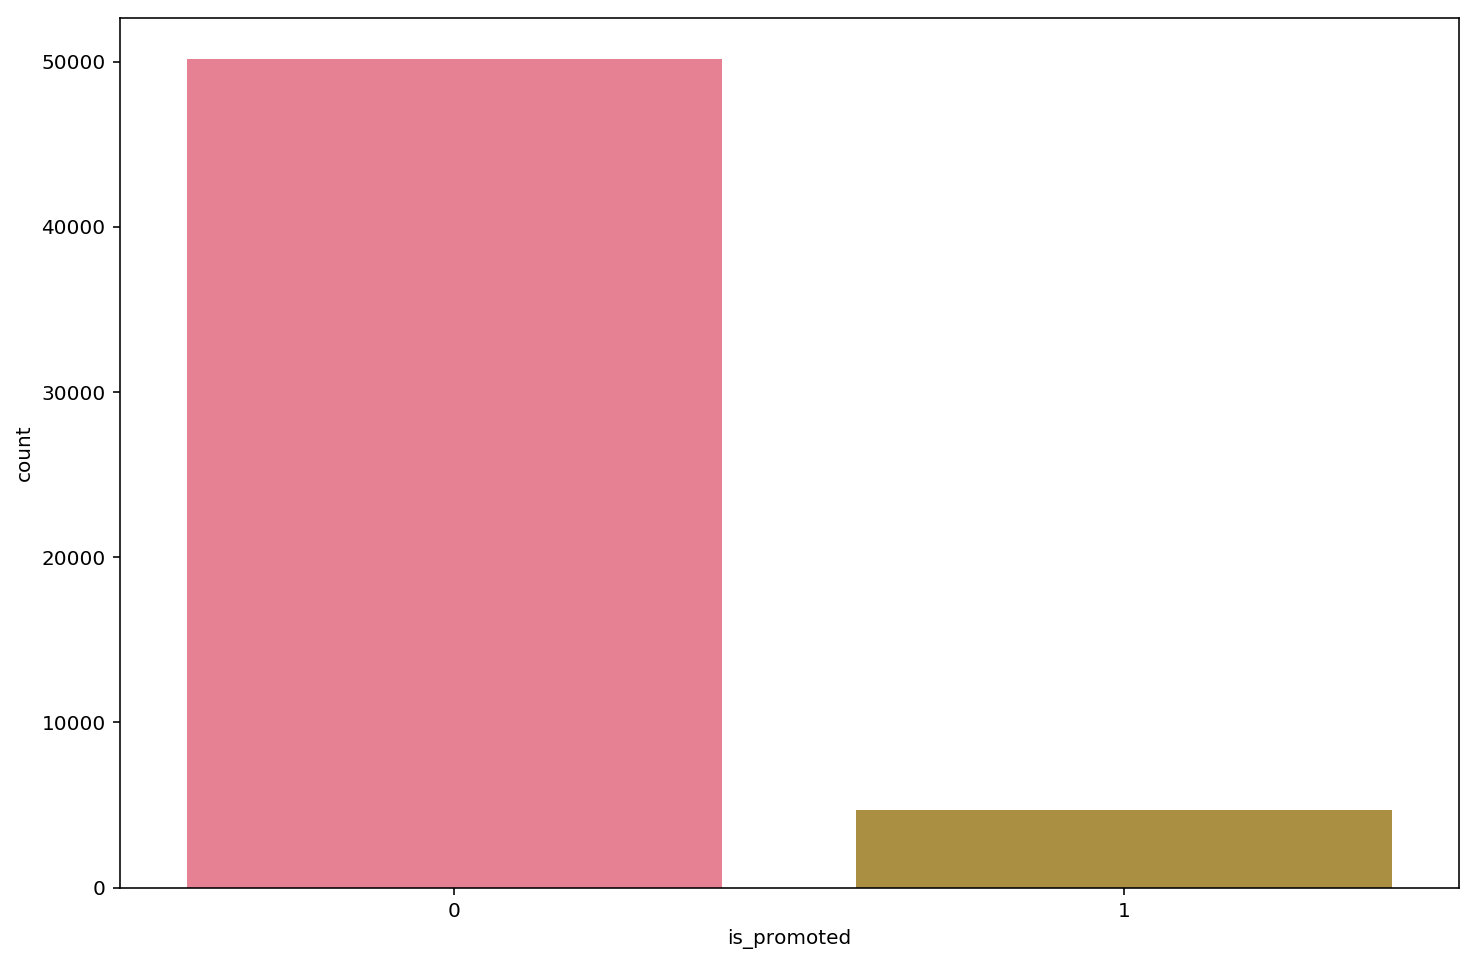

In [17]:
# Checking imbalance
sns.countplot('is_promoted', data = train)

# Filling missing values

## Education

In [18]:
train['education'].fillna("Other", inplace = True)
test['education'].fillna("Other", inplace = True)

## Previous year rating

In [19]:
train['previous_year_rating'].fillna(3.0, inplace = True)
test['previous_year_rating'].fillna(3.0, inplace = True)

# Treating categorical features

In [20]:
dataset = [train, test]

## Gender

In [21]:
gender_dict = {'f': 0, 'm': 1}
for data in dataset:
    data['gender'] = data['gender'].map(gender_dict)

## Number, department, education, recruitment_channel

## Region

In [22]:
# Impute region
dataset = [train, test]

for data in dataset:
    data['region'] = data['region'].apply(lambda x: x.split('_')[1])

In [23]:
train.drop("employee_id", axis = 1, inplace = True)
test.drop("employee_id", axis = 1, inplace = True)

In [ ]:
plt.figure(figsize= (25, 10))

train.corr()['is_promoted'][:-1]

# Features engineering

# Balancing data

# Scaling Features

# Applying PCA

# Grid Search Decision Tree

In [24]:
# Change type 'object' to 'category'
datset = [train, test]
for data in dataset:
    for col in ["department", "region", "education", "recruitment_channel"]:
            data[col] = data[col].astype('category')

In [25]:
X_train = train.drop('is_promoted', axis = 1)
y_train = train['is_promoted']

In [26]:
import lightgbm as lgb
params = {
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : 10,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2,
        'is_unbalance': True
    }

d_train = lgb.Dataset(X_train, label= y_train, categorical_feature= [0, 1, 2, 3, 4])

clf = lgb.train(params, d_train, 100)
predictions = clf.predict(test)


E:\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
E:\anaconda\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [27]:
predictions = pd.DataFrame(predictions)[0].apply(lambda x: 1 if x >= 0.5 else 0)

In [28]:
submission = pd.read_csv("SampleSubmission.csv")
final = pd.DataFrame({"employee_id": submission['employee_id'], "is_promoted": predictions})
final.to_csv("LightGBM.csv", index = False)
